In [1]:
%config Completer.use_jedi = False

from utils import *
from parallel import to_run, to_run_for_MvsT

import numpy as np
from matplotlib import pyplot as plt
import importlib
from multiprocessing import Pool
from tqdm.notebook import tqdm
import pickle


from ising_model import SimulateMH
BC = SimulateMH.BoundaryCondition

In [2]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 72
plt.rcParams["figure.figsize"] = [12,8]

In [ ]:
pool = Pool(4)

In [6]:
relaxation_time_normalized(1)*16

7031.25

In [25]:
scale = 200
times = 10
H = 0.1
Ts = np.linspace(0,4,scale*times).reshape((times, scale))

results = []
for Ts1 in tqdm(Ts):
    runs = len(Ts1)
    res = pool.starmap(to_run_for_MvsT, 
            zip(*(np.arange(runs),
                      [1_00_000]*runs, # steps
                      Ts1, # temperature
                      [4]*runs, # lattice size
                      [4]*runs, # lattice size
                      [1]*runs, # frequency
                      np.random.randint(0,10**8, runs), # seed
                      [BC.Periodic]*runs, # bc
                    [False]*runs, # return_engine
                    ["constant"]*runs, # init
                  [H]*runs # H field
                      ))
        )
    results+= res
results_p = results

results = []
for Ts1 in tqdm(Ts):
    runs = len(Ts1)
    res = pool.starmap(to_run_for_MvsT, 
            zip(*(np.arange(runs),
                      [1_00_000]*runs, # steps
                      Ts1, # temperature
                      [4]*runs, # lattice size
                      [4]*runs, # lattice size
                      [1]*runs, # frequency
                      np.random.randint(0,10**8, runs), # seed
                      [BC.Periodic]*runs, # bc
                    [False]*runs, # return_engine
                    ["constant"]*runs, # init
                  [-H]*runs # H field
                      ))
        )
    results+= res
    
results_n = results

In [26]:
Ts = np.array([T for T, _, M, _, E, _ in results])
meanMs_n = np.array([M[-3] for T, _, M, _, E, _ in results_n])
meanMs_p = np.array([M[-3] for T, _, M, _, E, _ in results_p])

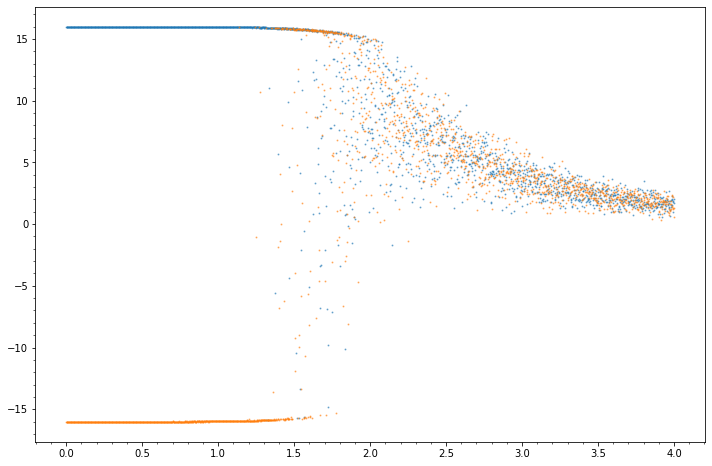

In [27]:
# plt.errorbar(Ts, np.abs(meanMs),yerr=errMs)
plt.scatter(Ts, (meanMs_p), s=1, marker="o", alpha=0.5)
plt.scatter(Ts, (-meanMs_n), s=1, marker="o",  alpha=0.5)
plt.minorticks_on()
# plt.grid(which="both")
# for t, m in zip(Ts, np.abs(meanMs)):
#     plt.gca().annotate(f'{t:0.2f}', (t,m))

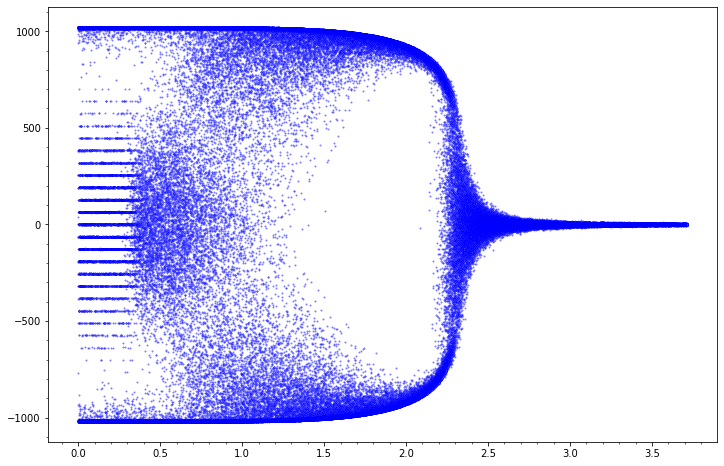

In [15]:
# plt.errorbar(Ts, np.abs(meanMs),yerr=errMs)
plt.scatter(Ts, (meanMs), s=1, marker="o", c="white", edgecolors="blue", alpha=0.5)
plt.minorticks_on()
# plt.grid(which="both")
# for t, m in zip(Ts, np.abs(meanMs)):
#     plt.gca().annotate(f'{t:0.2f}', (t,m))

In [13]:
print(len(meanMs[meanMs<-900]), len(meanMs[meanMs>+900]))

45572 46255


In [33]:
len(results[0][3])

10000

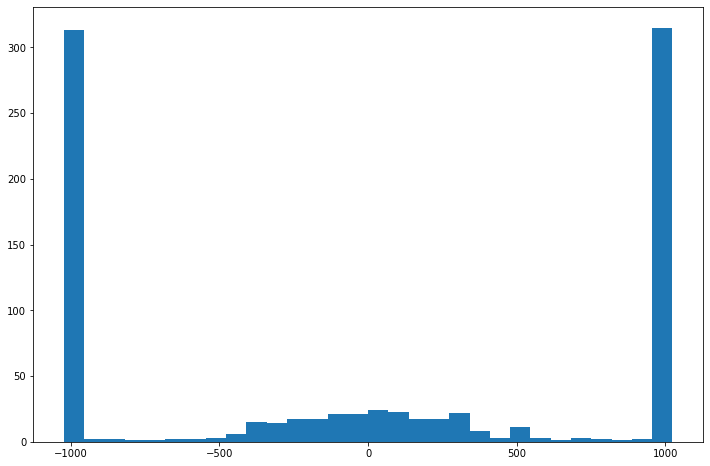

In [25]:
T1 = 1
dT = 0.1
plt.figure()
plt.hist(meanMs[(T1-dT < Ts) & (T1+dT > Ts)], bins=30);